In [2]:
 pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [9]:
#Reading the Dataset
xls = pd.ExcelFile("HospitalDatabase.xlsx")

#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')

#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')

#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')

#Reading the ReAdmissionRegistry 
df_RE = pd.read_excel(xls, 'ReAdmissionRegistry')

#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')

#Reading the Providers sheet
df_P = pd.read_excel(xls, 'Providers')

#Reading the EDUnique sheet
df_E = pd.read_excel(xls, 'EDUnique')

## Q1. Generate some random sequences using NumPy, and customize the line plots a tiny bit by setting a specific color for each, and labeling them

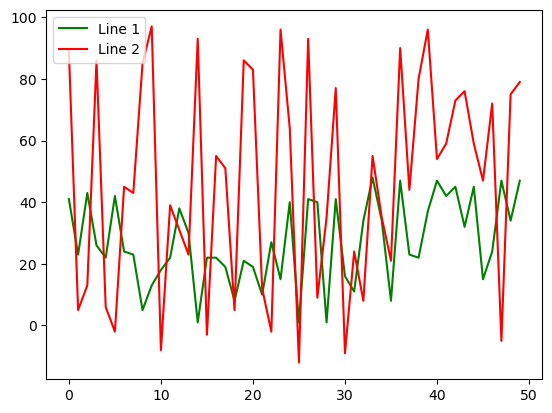

In [11]:
import matplotlib.pyplot as plt
import numpy as np

line_1 = np.random.randint(low = 0, high = 50, size = 50)
line_2 = np.random.randint(low = -15, high = 100, size = 50)

fig, ax = plt.subplots()

ax.plot(line_1, color = 'green', label = 'Line 1')
ax.plot(line_2, color = 'red', label = 'Line 2')
ax.legend(loc = 'upper left')
plt.show()

## Q2. Create a jointplot chart between expectedLOS & Primary diagnosis 

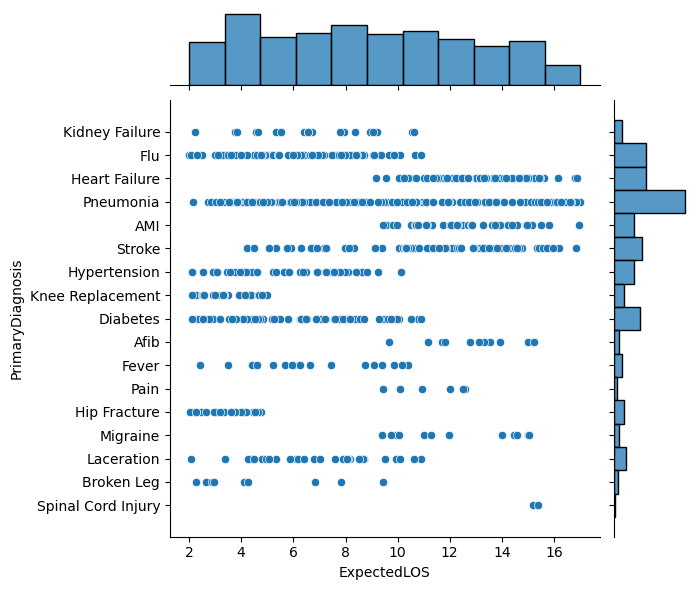

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

xls=pd.ExcelFile("HospitalDatabase.xlsx")
df_RE=pd.read_excel(xls,'ReAdmissionRegistry')
sns.jointplot(data=df_RE,x='ExpectedLOS',y='PrimaryDiagnosis')

## Q3. Plot a countplot for reasonforvisit in decending order and  label count values

[Text(0, 0, '234'),
 Text(0, 0, '201'),
 Text(0, 0, '186'),
 Text(0, 0, '156'),
 Text(0, 0, '149'),
 Text(0, 0, '109'),
 Text(0, 0, '39'),
 Text(0, 0, '31'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 0, '1')]

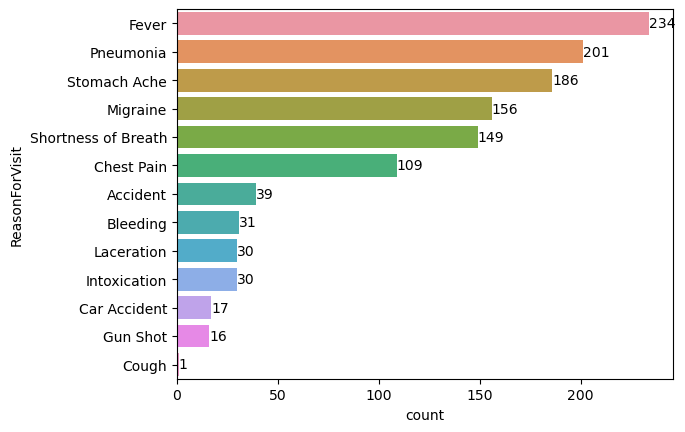

In [10]:
xls=pd.ExcelFile("HospitalDatabase.xlsx")
df_EDV=pd.read_excel(xls,'EDVisits')
ax=sns.countplot(data=df_EDV,y='ReasonForVisit',order=df_EDV['ReasonForVisit'].value_counts(ascending=False).index);
abs_values = df_EDV['ReasonForVisit'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

## Q4.Count the 'Black/African-American' patients

In [7]:
df_new_P = df_PA.loc[(df_PA['Race']=='Black/African-American') ]

print( 'Count Of Patients with Black/African-American ',  len(df_new_P.index))

Count Of Patients with Black/African-American  473


## Q5. Create an empty function so that code can be added in the future.

In [11]:
#Helps while writing large codes and reserve a specific function name we would like to use
def myEmptyFunc():
   # do nothing
   pass
myEmptyFunc()

## Q6.List out the ProviderIDs with their names and the number of their total patients with the correct column name

In [8]:
#Total count of Patients based on Provider ID
tot = df_AV.groupby(['ProviderID'])['PatientMRN'].count()

#Merge the 2 datframes
final = pd.merge(df_P[['ProviderID','ProviderName']], tot, on= "ProviderID")
#final.columns.str.replace("PatientMRN", "P_Cnt")

#Rename the output column with PatientCnt
final.rename(columns={"PatientMRN": "PatientCnt"}, inplace=True)
final

,ProviderID,ProviderName,PatientCnt
0,1,Sally Sue,38
1,2,Mike Myers,26
2,3,Jordan Michael,28
3,4,Ted Texas,27
4,5,Ala Bama,27
5,6,Harry Kane,28
6,7,Barry Bar,31
7,8,Ted Green,27
8,9,Ted Black,27
9,10,Fred Man,30


## Q7.In the given numpy array, delete third column and replace with new column value

In [18]:
inputArray = np.array([[35,53,63],[72,12,22],[43,84,56]])
new_col = np.array([[20,30,40]])

# delete 3rd column
arr = np.delete(inputArray , 2, axis = 1)

#insert new_col to array
arr = np.insert(arr , 2, new_col, axis = 1)
print (arr) 


[[35 53 20]
 [72 12 30]
 [43 84 40]]


## Q8. Using the filter() function display Patients details along with Service and Primary Diagnosis

In [10]:
#Creating a new dataframe
RE_new_df = df_RE.filter(['PatientID','Service','PrimaryDiagnosis'],axis=1)

#Merging 2 sheets
final1 = pd.merge(df_PA, RE_new_df, on= "PatientID")
final1

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Service,PrimaryDiagnosis
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,Hospitalist,Kidney Failure
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,General Medicine,Flu
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,General Medicine,Flu
3,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,General Medicine,Flu
4,6,Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English,ICU,Heart Failure
...,...,...,...,...,...,...,...,...,...
715,738,Konopelski,Group,1975-11-28 02:34:22.237,Female,White,English,Cardiology,AMI
716,739,Chandal,Group,1985-04-19 17:45:10.810,Female,White,English,ICU,Pneumonia
717,740,Tiena,Mahomet,1960-07-23 09:04:25.637,Female,White,English,Hospitalist,Pneumonia
718,741,Rogahn,Group,1960-03-14 20:14:13.941,Female,White,English,General Medicine,Flu


## Q9. Create a 3D plot with any example

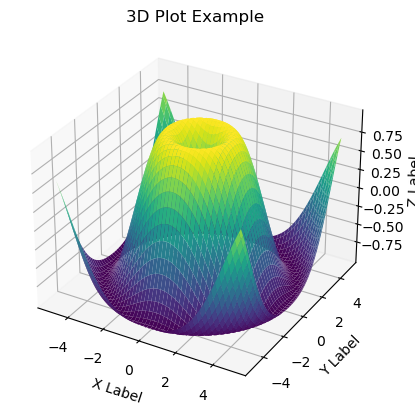

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Plot Example')

# Show the plot
plt.show()

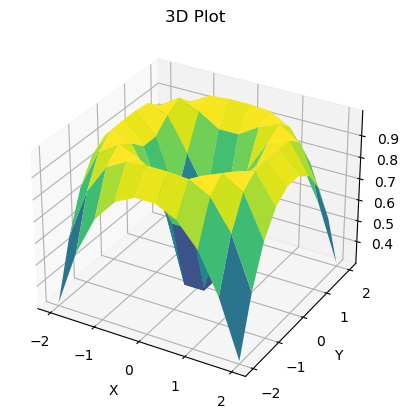

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.linspace(-2,2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
ax.set_title('3D Plot')

# Show the plot
plt.show()

## Q10. Generate random numbers

In [20]:
import random
print(random.randrange(5,100,2))

71


## Q11.Check if all characters in the given string is alphanumeric

In [21]:
import re
print(bool(re.match('[A-Za-z0-9]+$','abdc1321'))) 
print(bool(re.match('[A-Za-z0-9]+$','xyz@123$'))) 

True
False


## Q12.Reversing an array

In [27]:
import array as arr

Array_d = arr.array('i',[1,2,3,4,5])
Array_d[::-1]

array('i', [5, 4, 3, 2, 1])

## Q13. Removing duplicate element in a list

In [32]:
demo_list=[5,4,4,6,8,12,12,1,5]

#set() removes duplicate
unique_list = list(set(demo_list))
unique_list

[1, 4, 5, 6, 8, 12]